#Basic Pytorch 


In [1]:
import torch 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x=torch.ones(3,2)
print(x)
x=torch.zeros(3,2)
print(x)
x=torch.rand(3,2)
print(x)
y=np.ones((3, 2))
print(y)
y=np.zeros((3, 2))
print(y)
y=np.random.random((3, 2))
print(y)

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])
tensor([[0., 0.],
        [0., 0.],
        [0., 0.]])
tensor([[0.3075, 0.1644],
        [0.2836, 0.1891],
        [0.8622, 0.6108]])
[[1. 1.]
 [1. 1.]
 [1. 1.]]
[[0. 0.]
 [0. 0.]
 [0. 0.]]
[[0.2313304  0.65275143]
 [0.600482   0.82778655]
 [0.55849566 0.50059239]]


In [3]:
x= torch.empty(3,2) #enters dummy values but does not initialize
print(x)

tensor([[3.9430e-36, 0.0000e+00],
        [3.3631e-44, 0.0000e+00],
        [       nan, 0.0000e+00]])


In [4]:
y=torch.zeros_like(x)

In [5]:
x=torch.tensor([[1,2],
               [3,4],
               [5,6]])
print(x)

tensor([[1, 2],
        [3, 4],
        [5, 6]])


In [6]:

print(x)
print(y)
z=x+y
print(z)
a=z.add(y)
print(a)
b=a.add_(x)
print(a)
print(b)

tensor([[1, 2],
        [3, 4],
        [5, 6]])
tensor([[0., 0.],
        [0., 0.],
        [0., 0.]])
tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])
tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])
tensor([[ 2.,  4.],
        [ 6.,  8.],
        [10., 12.]])
tensor([[ 2.,  4.],
        [ 6.,  8.],
        [10., 12.]])


#Slicing tensors 

In [7]:
print(x.size())

torch.Size([3, 2])


In [8]:
print(x)
print(x[:, 0])
print(x[1,:])

tensor([[1, 2],
        [3, 4],
        [5, 6]])
tensor([1, 3, 5])
tensor([3, 4])


In [9]:
y=x[1,1]
print(y)
print(y.item())

tensor(4)
4


#Reshaping Tensors 

In [10]:
print(x)

tensor([[1, 2],
        [3, 4],
        [5, 6]])


In [11]:
y=x.view(2, -1)
print(y)

tensor([[1, 2, 3],
        [4, 5, 6]])


In [12]:
y=y.view(6, -1)
print(y)


tensor([[1],
        [2],
        [3],
        [4],
        [5],
        [6]])


#Numpy <> Pytorch

In [13]:
print(x)

tensor([[1, 2],
        [3, 4],
        [5, 6]])


In [14]:
x_np=x.numpy()
print(x_np)

[[1 2]
 [3 4]
 [5 6]]


In [15]:
x.add_(torch.ones_like(x))
print(x)

tensor([[2, 3],
        [4, 5],
        [6, 7]])


In [16]:
print(x_np)

[[2 3]
 [4 5]
 [6 7]]


In [17]:
c=[[1, 2, 3],[4, 5, 6]]
print(c)

[[1, 2, 3], [4, 5, 6]]


In [18]:
type(c)

list

In [19]:
c=np.asarray([[1,2,3],[5,6,7]])
print(c)
print(type(c))

[[1 2 3]
 [5 6 7]]
<class 'numpy.ndarray'>


In [20]:
c_pt=torch.from_numpy(c)
print(c_pt)

tensor([[1, 2, 3],
        [5, 6, 7]])


In [21]:
np.add(c, 1, out=c)
print(c)

[[2 3 4]
 [6 7 8]]


In [22]:
print(c_pt)

tensor([[2, 3, 4],
        [6, 7, 8]])


In [23]:
%%time
for i in range(10):
  a=np.random.random(100)
  b=np.random.random(100)
  c=np.matmul(a, b)


CPU times: user 175 µs, sys: 0 ns, total: 175 µs
Wall time: 182 µs


In [24]:
%%time 
for i in range(10):
  a=torch.rand(100)
  b=torch.rand(100)
  c=torch.matmul(a, b)

CPU times: user 0 ns, sys: 348 µs, total: 348 µs
Wall time: 5.02 ms


#Involving GPU

In [25]:
print(torch.cuda.device_count())

1


In [26]:
print(torch.cuda.device(0))
print(torch.cuda.get_device_name())

Tesla T4


In [27]:
cuda0=torch.device('cuda:0')

In [28]:
a=torch.ones((2, 3), device=cuda0)
b=torch.ones((2, 3), device=cuda0)
c=a+b
print(a)
print(b)
print(c)

tensor([[1., 1., 1.],
        [1., 1., 1.]], device='cuda:0')
tensor([[1., 1., 1.],
        [1., 1., 1.]], device='cuda:0')
tensor([[2., 2., 2.],
        [2., 2., 2.]], device='cuda:0')


In [29]:
%%time
for i in range(10):
  a=np.random.random(100)
  b=np.random.random(100)
  c=np.matmul(a, b)

CPU times: user 140 µs, sys: 0 ns, total: 140 µs
Wall time: 145 µs


In [30]:
%%time 
for i in range(10):
  a=torch.rand(100)
  b=torch.rand(100)
  c=torch.matmul(a, b)

CPU times: user 192 µs, sys: 0 ns, total: 192 µs
Wall time: 198 µs


In [31]:
%%time 
for i in range(10):
  a=torch.rand(100, device=cuda0)
  b=torch.rand(100, device=cuda0)
  c=torch.matmul(a, b)

CPU times: user 1.84 ms, sys: 0 ns, total: 1.84 ms
Wall time: 8.64 ms


#Automatic Differenciation


In [32]:
import torch
x=torch.ones([3,4], requires_grad=True)

In [33]:
y=x+5
z=y**2 +1
print(y)
print(z)
t=torch.sum(z)
print(z)
t.backward()
print(x.grad) #prints the differenciation if t w.r.t x

tensor([[6., 6., 6., 6.],
        [6., 6., 6., 6.],
        [6., 6., 6., 6.]], grad_fn=<AddBackward0>)
tensor([[37., 37., 37., 37.],
        [37., 37., 37., 37.],
        [37., 37., 37., 37.]], grad_fn=<AddBackward0>)
tensor([[37., 37., 37., 37.],
        [37., 37., 37., 37.],
        [37., 37., 37., 37.]], grad_fn=<AddBackward0>)
tensor([[12., 12., 12., 12.],
        [12., 12., 12., 12.],
        [12., 12., 12., 12.]])


In [34]:
x=torch.ones([3,2], requires_grad=True)
y=x+5
r=1/(1+torch.exp(-y))
s=torch.sum(r)
s.backward()
print(x.grad)

tensor([[0.0025, 0.0025],
        [0.0025, 0.0025],
        [0.0025, 0.0025]])


In [35]:
x=torch.ones([3,2], requires_grad=True)
y=x+5
r=1/(1+torch.exp(-y))
a=torch.ones_like(r) #a is a scalar matrix whuch must have the same size as r
r.backward(a) 
print(x.grad)

tensor([[0.0025, 0.0025],
        [0.0025, 0.0025],
        [0.0025, 0.0025]])


In [36]:
x= torch.randn([20, 1], requires_grad=True)
y=3*x-2

In [37]:
w=torch.tensor([1.], requires_grad=True)
b=torch.tensor([1.], requires_grad=True)
y_hat=w*x+b
loss=sum((y_hat-y)**2)

In [38]:
print(loss)

tensor([177.2720], grad_fn=<AddBackward0>)


In [39]:
loss.backward()

In [40]:
print(w.grad, b.grad)

tensor([-11.9632]) tensor([110.2059])


In [41]:
learning_rate=0.01
w=torch.tensor([1.], requires_grad=True)
b=torch.tensor([1.], requires_grad=True)
print(w.item(), b.item())
for i in range(10):
  x=torch.randn([20, 1])
  y=3*x-2

  y_hat=w*x+b
  loss=torch.sum((y_hat-y)**2)
  loss.backward()
  with torch.no_grad():
    w-=learning_rate*w.grad
    b-=learning_rate*b.grad
    w.grad.zero_()
    b.grad.zero_()
  print(w.item(), b.item())

1.0 1.0
2.028731346130371 -0.2727830410003662
2.291142702102661 -0.9707301259040833
2.7479805946350098 -1.4095649719238281
2.852459669113159 -1.6520020961761475
2.8860726356506348 -1.7796242237091064
2.9208884239196777 -1.8652315139770508
2.9498629570007324 -1.9133681058883667
2.958203077316284 -1.946061134338379
2.9819674491882324 -1.971982479095459
2.9890592098236084 -1.9833402633666992


In [42]:
learning_rate=0.01
N=10000
epochs=2000

w=torch.tensor([10000.], requires_grad=True)
b=torch.tensor([1.], requires_grad=True)
for i in range(epochs):
  x=torch.rand([N])
  y=torch.dot(3*torch.ones([N]), x)-2

  y_hat=w*x+b
  loss=torch.sum((y_hat-y)**2)

  loss.backward()
  with torch.no_grad():
    w-=learning_rate*w.grad
    b-=learning_rate*b.grad
    w.grad.zero_()
    b.grad.zero_()
print(torch.mean(w).item(), b.item())    


nan nan


#Feed Forward Networks with Pytorch 


In [66]:
import numpy as np
import math 
import matplotlib.pyplot as plt
import matplotlib.colors
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, mean_squared_error, log_loss
from tqdm import tqdm_notebook 
import seaborn as sns
import time 
from  IPython.display import HTML
import warnings 
warnings. filterwarnings('ignore')

from sklearn.preprocessing import OneHotEncoder 
from sklearn.datasets import make_blobs 

import torch 

In [67]:
torch.manual_seed(0)

In [68]:
my_cmap=matplotlib.colors.LinearSegmentedColormap.from_list('', ['violet','black','darkblue'])

In [69]:
#Generating dataset

In [70]:
data, labels= make_blobs(n_samples=1000, n_features=2, centers=4, random_state=0)
print(data.shape, labels.shape)

(1000, 2) (1000,)


In [71]:
print(labels)

[3 0 3 2 1 0 0 1 0 0 3 1 2 3 1 2 2 3 0 1 0 3 1 1 1 2 1 1 1 2 1 0 3 2 3 0 3
 0 2 2 0 0 0 2 3 0 0 3 2 0 1 0 0 2 3 1 0 0 3 3 1 1 2 2 2 3 0 2 3 3 3 3 3 2
 0 3 0 3 2 1 0 0 0 2 1 0 0 0 2 2 3 2 2 3 3 3 2 2 0 0 1 2 0 1 0 2 0 3 2 1 0
 0 2 3 2 2 0 2 1 1 1 3 2 2 0 1 0 3 2 1 1 0 2 0 0 0 2 0 1 3 1 3 1 0 3 3 1 0
 3 3 1 0 0 0 2 0 0 0 1 2 3 1 0 0 0 0 3 3 0 1 2 1 1 1 2 1 2 1 1 0 2 0 2 0 0
 2 1 2 1 3 2 0 1 1 2 3 2 3 2 2 2 0 3 3 1 1 2 0 3 0 3 2 0 3 2 0 0 1 1 3 0 0
 0 3 0 0 0 2 3 3 0 2 0 0 2 1 2 1 1 2 0 2 1 1 3 3 3 3 3 3 0 2 3 2 2 1 2 0 3
 0 1 3 0 1 3 2 0 2 3 1 1 0 1 2 3 3 2 3 2 0 1 3 2 0 2 2 2 0 2 3 1 2 0 3 3 1
 3 1 0 3 1 3 3 2 2 3 0 0 1 0 0 0 3 1 2 0 2 1 0 3 0 3 1 2 2 0 3 1 3 1 3 1 3
 2 2 3 1 0 1 0 2 0 3 0 1 1 1 1 1 1 2 1 2 1 0 3 1 3 3 0 0 0 0 3 3 2 3 3 3 0
 3 1 2 3 2 1 2 0 3 3 3 0 2 1 1 1 3 3 2 3 1 3 1 3 2 3 3 1 1 0 3 2 3 2 2 1 0
 0 0 3 2 0 2 2 2 0 0 3 1 3 0 2 2 2 3 0 3 3 0 0 2 1 2 3 3 0 2 0 1 3 1 3 3 2
 2 0 1 0 0 0 2 3 0 2 3 1 2 1 3 1 0 1 0 3 3 1 2 3 3 1 0 2 0 0 0 0 0 1 2 0 2
 0 1 0 3 2 2 3 3 3 3 1 2 

In [72]:
print(data)

[[-2.50804312  7.86408052]
 [ 0.4666179   3.86571303]
 [-2.94062621  8.56480636]
 ...
 [-1.13551783  8.49272771]
 [-1.22933367  7.75342586]
 [ 3.90485877  0.683497  ]]


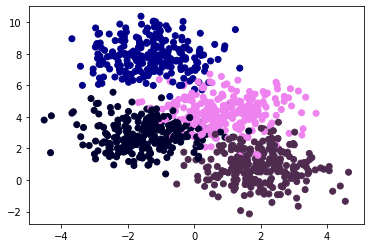

In [73]:
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap=my_cmap)
plt.show()

In [74]:
X_train, X_test, Y_train, Y_test= train_test_split(data, labels, stratify=labels, random_state=0)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(750, 2) (250, 2) (750,) (250,)


In [86]:
X_train, X_test, Y_train, Y_test= map(torch.tensor, (X_train, X_test, Y_train, Y_test))
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

torch.Size([750, 2]) torch.Size([250, 2]) torch.Size([750]) torch.Size([250])


In [87]:
def model(x):
  a1 = torch.matmul(x, weights1) + bias1 # (N, 2) x (2, 2) -> (N, 2)
  h1 = a1.sigmoid() # (N, 2)
  a2 = torch.matmul(h1, weights2) + bias2 # (N, 2) x (2, 4) -> (N, 4)
  h2 = a2.exp()/a2.exp().sum(-1).unsqueeze(-1) # (N, 4)
  return h2

In [88]:
def loss_fn(y_hat, y):
  return -(y_hat[range(y.shape[0]), y].log()).mean()

In [89]:
def accuracy(y_hat, y):
  pred = torch.argmax(y_hat, dim=1)
  return (pred == y).float().mean()

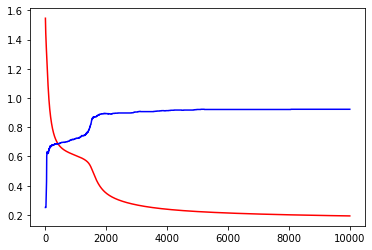

Loss before training 1.5456441640853882
Loss after training 0.19288592040538788


In [90]:
torch.manual_seed(0)
weights1 = torch.randn(2, 2) / math.sqrt(2)
weights1.requires_grad_()
bias1 = torch.zeros(2, requires_grad=True)

weights2 = torch.randn(2, 4) / math.sqrt(2)
weights2.requires_grad_()
bias2 = torch.zeros(4, requires_grad=True)

learning_rate = 0.2
epochs = 10000

X_train = X_train.float()
Y_train = Y_train.long()

loss_arr = []
acc_arr = []

for epoch in range(epochs):
  y_hat = model(X_train)
  loss = loss_fn(y_hat, Y_train)
  loss.backward()
  loss_arr.append(loss.item())
  acc_arr.append(accuracy(y_hat, Y_train))

  with torch.no_grad():
    weights1 -= weights1.grad * learning_rate
    bias1 -= bias1.grad * learning_rate
    weights2 -= weights2.grad * learning_rate
    bias2 -= bias2.grad * learning_rate
    weights1.grad.zero_()
    bias1.grad.zero_()
    weights2.grad.zero_()
    bias2.grad.zero_()

plt.plot(loss_arr, 'r-')
plt.plot(acc_arr, 'b-')
plt.show()
print('Loss before training', loss_arr[0])
print('Loss after training', loss_arr[-1])